In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [49]:
df=pd.read_csv('bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [50]:
df.shape

(13200, 7)

In [51]:
min_threshold,max_threshold=df.price_per_sqft.quantile([0.001,0.999])
min_threshold,max_threshold

(1366.184, 50959.36200000098)

In [54]:
df2 = df[(df.price_per_sqft<max_threshold) & (df.price_per_sqft>min_threshold)]
df2.shape

(13172, 7)

In [55]:
upper_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
upper_limit

23227.73653589429

In [56]:
lower_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
lower_limit


-9900.429065502549

In [57]:
df_no_outlier_std_dev = df2[(df2.price_per_sqft<upper_limit) & (df2.price_per_sqft>lower_limit)]
df_no_outlier_std_dev.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [58]:
df_no_outlier_std_dev.shape

(13047, 7)

In [59]:
df.shape

(13200, 7)

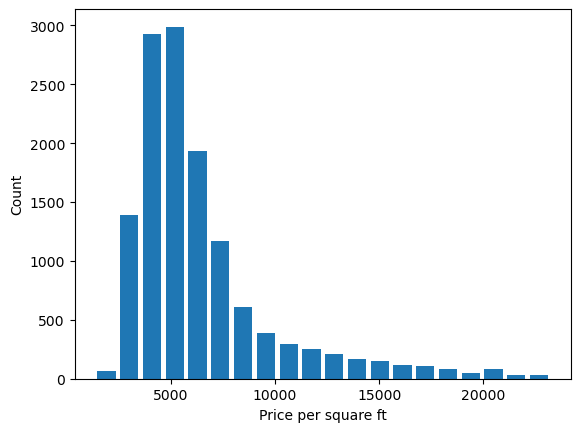

In [60]:
plt.hist(df_no_outlier_std_dev.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

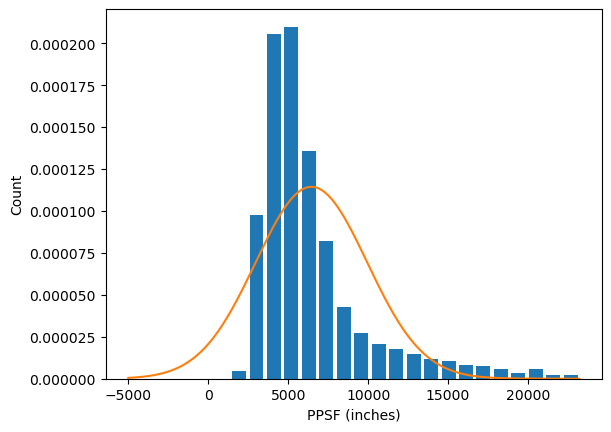

In [61]:
from scipy.stats import norm
import numpy as np
plt.hist(df_no_outlier_std_dev.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('PPSF (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df_no_outlier_std_dev.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df_no_outlier_std_dev.price_per_sqft.mean(),df_no_outlier_std_dev.price_per_sqft.std()))


In [62]:
df2['zscore'] = ( df2.price_per_sqft - df2.price_per_sqft.mean() ) / df2.price_per_sqft.std()
df2.head(5)


C:\Users\User\AppData\Local\Temp\ipykernel_15296\978490485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = ( df2.price_per_sqft - df2.price_per_sqft.mean() ) / df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [63]:
df_no_outliers = df2[(df2.zscore>-4) & (df2.zscore<4)]
df_no_outliers.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [64]:
df_no_outliers.shape

(13047, 8)

In [65]:
df.shape

(13200, 7)